In [1]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine, text
import pandas.io.sql as sqlio

In [82]:
db_params = {
    'host': "127.0.0.1",
    'database': 'postgres',
    'user': 'postgres',
    'password': 'yihui',
    'port': '5432'
}

conn = psycopg2.connect(
    host=db_params['host'],
    database=db_params['database'],
    user=db_params['user'],
    password=db_params['password'],
    port=db_params['port']
)

## Create a cursor object
cur = conn.cursor()

## Set autocommit to true so that every operation is committed without having to call conn.committ() after each command
conn.set_session(autocommit=True)

db_params['database'] = 'propertypricedublin'
engine = create_engine(f'postgresql://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}/{db_params["database"]}')

## select the columns we need
sql = """
select * from dublin_houseprice2019;
"""

try:
    dbConnection = psycopg2.connect(
        user="postgres",
        password="yihui",
        host = "127.0.0.1",
        port = "5432",
        database = "propertypricedublin"
    )
    Dublin_houseprice_df = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()

/var/folders/0h/6g4v4bts70d8f7w8jz6ttw2w0000gn/T/ipykernel_46238/757727777.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Dublin_houseprice_df = sqlio.read_sql_query(sql, dbConnection)


In [83]:
Dublin_houseprice_df

,sale_date,address,county,eircode,price,address_full,latitude,longitude,garda division
0,2019-01-01T00:00:00,"2 leix rd, cabra, dublin 7",Dublin,Dublin 7,30000.0,"2 leix rd, cabra, dublin 7, Dublin 7, ireland",53.361681,-6.283696,DMR North Central
1,2019-01-01T00:00:00,"2 woodale view, ballycullen, firhouse dublin 24",Dublin,Dublin 24,30000.0,"2 woodale view, ballycullen, firhouse dublin 2...",53.275813,-6.336377,DMR South
2,2019-01-01T00:00:00,"apt 50, earlsfield court, francis st dublin 8",Dublin,Dublin 8,15000.0,"apt 50, earlsfield court, francis st dublin 8,...",53.339771,-6.274053,DMR South Central
3,2019-01-02T00:00:00,"3 somerton copse, lucan",Dublin,,290750.0,"3 somerton copse, lucan, , ireland",53.343295,-6.454770,DMR West
4,2019-01-02T00:00:00,"31 all saints park, raheny, dublin 5",Dublin,Dublin 5,460000.0,"31 all saints park, raheny, dublin 5, Dublin 5...",53.376001,-6.178450,DMR North
...,...,...,...,...,...,...,...,...,...
9765,2019-08-16T00:00:00,"6 sq st margarets rd, lanesborough dublin 1, d...",Dublin,Dublin 15,248500.0,"6 sq st margarets rd, lanesborough dublin 1, d...",53.402895,-6.294621,DMR West
9766,2019-08-16T00:00:00,"73 clanmaurice rd, donnycarney, dublin 5",Dublin,Dublin 5,320000.0,"73 clanmaurice rd, donnycarney, dublin 5, Dubl...",53.376230,-6.212896,DMR North
9767,2019-08-16T00:00:00,"8 alexandra court, dundrum, dublin 16",Dublin,Dublin 14,285000.0,"8 alexandra court, dundrum, dublin 16, Dublin ...",53.294679,-6.246034,DMR East
9768,2019-08-16T00:00:00,"apt 1, 3 dermot st, clongriffin dublin 13",Dublin,Dublin 13,215000.0,"apt 1, 3 dermot st, clongriffin dublin 13, Dub...",53.403290,-6.156977,DMR North


In [84]:
### check the longitude less than -20
filtered_rows = Dublin_houseprice_df[Dublin_houseprice_df['longitude'] < -20]

In [85]:
filtered_rows ## the coordinates wrong 

,sale_date,address,county,eircode,price,address_full,latitude,longitude,garda division
5019,2019-04-30T00:00:00,"apt 65 james harold suite, west park, city west",Dublin,Dublin 24,246428.57,"apt 65 james harold suite, west park, city wes...",25.984607,-80.202558,DMR South


In [86]:
Dublin_houseprice_df = Dublin_houseprice_df.drop(filtered_rows.index)

In [87]:
filtered_rows2 = Dublin_houseprice_df[Dublin_houseprice_df['latitude'] > 54.6]
filtered_rows2

,sale_date,address,county,eircode,price,address_full,latitude,longitude,garda division
7674,2019-06-25T00:00:00,"9 castledawson, rock rd, sion hill",Dublin,,475000.0,"9 castledawson, rock rd, sion hill, , ireland",54.778234,-6.557919,DMR East


In [88]:
Dublin_houseprice_df = Dublin_houseprice_df.drop(filtered_rows2.index)

In [89]:
## reset the index
Dublin_houseprice_df = Dublin_houseprice_df.reset_index(drop=True)

### The average house price in dublin

In [90]:
average_dublin = Dublin_houseprice_df['price'].mean().round(3)
minimum_dublin = Dublin_houseprice_df['price'].min().round(3)
maximum_dublin = Dublin_houseprice_df['price'].max().round(3)

print('The average house price in Dublin is: ', average_dublin)
print('The maximum house price in Dublin is: ', maximum_dublin)
print('The minimum house price in Dublin is: ', minimum_dublin)

The average house price in Dublin is:  482972.565
The maximum house price in Dublin is:  129500000.0
The minimum house price in Dublin is:  5900.0


### However the price of some luxury properties can drive up the average price

### So let's check the Price Distribution

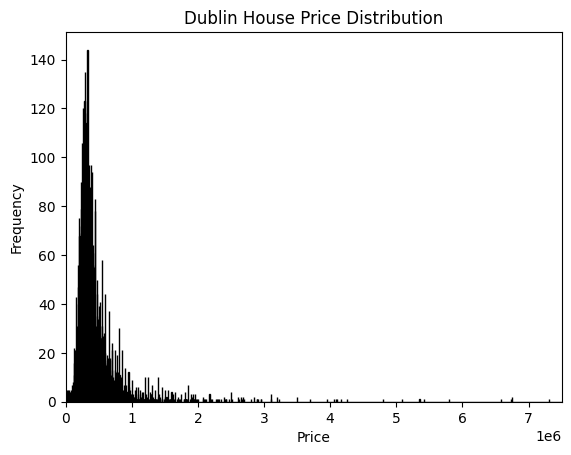

In [112]:
import matplotlib.pyplot as plt

# Create a histogram to visualize the distribution of prices
plt.hist(Dublin_houseprice_df['price'], bins=100000, color='skyblue', edgecolor='black')

plt.xlim(right=7500000)
plt.xlim(left=0)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Dublin House Price Distribution')

# Show plot
plt.show()

### We can see that the house price mainly distributed between 0 to 3 million

In [99]:
dublin_house_main = Dublin_houseprice_df[Dublin_houseprice_df['price']<=3000000].copy()

In [100]:
dublin_house_main = dublin_house_main.reset_index(drop=True)

In [101]:
average_dublin_main = dublin_house_main['price'].mean().round(3)

print('The average house price in Dublin between the main price distrubution region is: ', average_dublin_main)

The average house price in Dublin between the main price distrubution region is:  408550.314


#### seem like this price it's more reasionable

### Get rows where the 'price' lower than 408540.477

In [102]:
dublin_property_less_average = Dublin_houseprice_df[Dublin_houseprice_df['price']<=average_dublin_main].copy()

### Get rows where the 'price' greater than 3 million

In [103]:
dublin_property_larger_than_3m = Dublin_houseprice_df[Dublin_houseprice_df['price']>3000000].copy()

### get the clip of data in different regions

In [104]:
DMR_north = Dublin_houseprice_df[Dublin_houseprice_df['garda division'] == 'DMR North'].copy()
DMR_north_central = Dublin_houseprice_df[Dublin_houseprice_df['garda division'] == 'DMR North Central'].copy()
DMR_south = Dublin_houseprice_df[Dublin_houseprice_df['garda division'] == 'DMR South'].copy()
DMR_south_central = Dublin_houseprice_df[Dublin_houseprice_df['garda division'] == 'DMR South Central'].copy()
DMR_west = Dublin_houseprice_df[Dublin_houseprice_df['garda division'] == 'DMR West'].copy()
DMR_east = Dublin_houseprice_df[Dublin_houseprice_df['garda division'] == 'DMR East'].copy()

### The average price, minimum and maximum price and price distribution

### 1. DMR North

In [98]:
num_property_north = len(DMR_north)
print('Number of property recorded in DMR North is: ', num_property_north)

Number of property recorded in DMR North is:  2558


In [57]:
average_north = DMR_north['price'].mean().round(3)
minimum_north = DMR_north['price'].min().round(3)
maximum_north = DMR_north['price'].max().round(3)

print('The average house price in DMR North is: ', average_north)
print('The maximum house price in DMR North is: ', maximum_north)
print('The minimum house price in DMR North is: ', minimum_north)

The average house price in DMR North is:  446000.616
The maximum house price in DMR North is:  48324000.0
The minimum house price in DMR North is:  7215.86


### DMR_north: Check the distribution

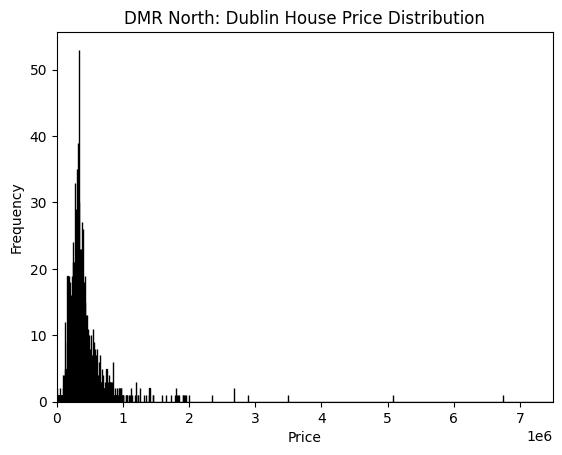

In [58]:
# Create a histogram to visualize the distribution of prices
plt.hist(DMR_north['price'], bins=100000, color='skyblue', edgecolor='black')

plt.xlim(right=7500000)
plt.xlim(left=0)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('DMR North: Dublin House Price Distribution')

# Show plot
plt.show()

### DMR North: The average price of the main distribution 

In [59]:
North_house_main = DMR_north[DMR_north['price']<=2000000].copy()
North_average_dublin_main = North_house_main['price'].mean().round(3)

print('The average house price in DMR North between the main price distribution regions is: ', North_average_dublin_main)

The average house price in DMR North between the main price distribution regions is:  373828.716


### 2. DMR South

In [110]:
num_property_south = len(DMR_south)
print('Number of property recorded in DMR South is: ', num_property_south)

Number of property recorded in DMR South is:  1655


In [74]:
average_south = DMR_south['price'].mean().round(3)
minimum_south = DMR_south['price'].min().round(3)
maximum_south = DMR_south['price'].max().round(3)

print('The average house price in DMR South is: ', average_south)
print('The maximum house price in DMR South is: ', maximum_south)
print('The minimum house price in DMR South is: ', minimum_south)

The average house price in DMR South is:  433426.47
The maximum house price in DMR South is:  6584000.0
The minimum house price in DMR South is:  12463.22


### DMR South: Check the distribution

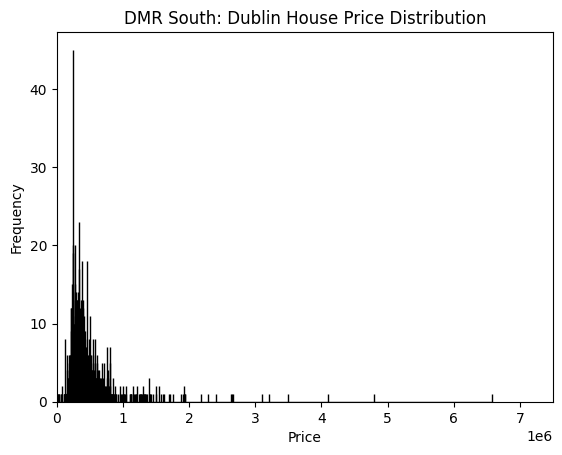

In [75]:
# Create a histogram to visualize the distribution of prices
plt.hist(DMR_south['price'], bins=100000, color='skyblue', edgecolor='black')

plt.xlim(right=7500000)
plt.xlim(left=0)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('DMR South: Dublin House Price Distribution')

# Show plot
plt.show()

### DMR South: The average price of the main distributio

In [76]:
South_house_main = DMR_south[DMR_south['price']<=3000000].copy()
South_average_dublin_main = South_house_main['price'].mean().round(3)

print('The average house price in DMR South between the main price distribution regions is: ', South_average_dublin_main)

The average house price in DMR South between the main price distribution regions is:  419670.593


### 3. DMR North Central

In [61]:
num_property_north_central = len(DMR_north_central)
print('Number of property recorded in DMR North Central is: ', num_property_north_central)

Number of property recorded in DMR North Central is:  664


In [22]:
average_north_central = DMR_north_central['price'].mean().round(3)
minimum_north_central = DMR_north_central['price'].min().round(3)
maximum_north_central = DMR_north_central['price'].max().round(3)

print('The average house price in DMR North Central is: ', average_north_central)
print('The maximum house price in DMR North Central is: ', maximum_north_central)
print('The minimum house price in DMR North Central is: ', minimum_north_central)

The average house price in DMR North Central is:  441783.153
The maximum house price in DMR North Central is:  22008000.0
The minimum house price in DMR North Central is:  5900.0


### DMR North Central: Check the distribution

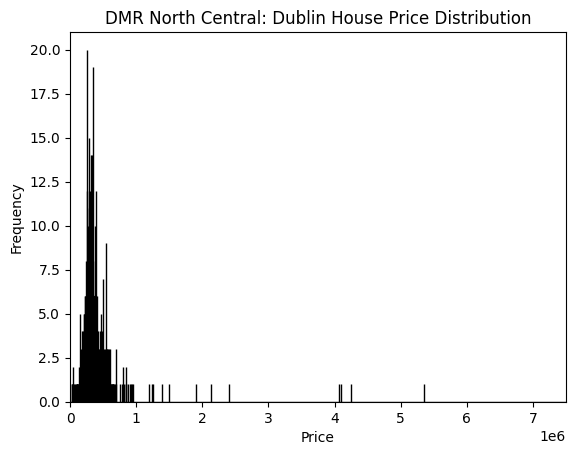

In [23]:
# Create a histogram to visualize the distribution of prices
plt.hist(DMR_north_central['price'], bins=100000, color='skyblue', edgecolor='black')

plt.xlim(right=7500000)
plt.xlim(left=0)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('DMR North Central: Dublin House Price Distribution')

# Show plot
plt.show()

### DMR North Central: The average price of the main distribution

In [24]:
North_central_house_main = DMR_north_central[DMR_north_central['price']<=3000000].copy()
North_central_average_dublin_main = North_central_house_main['price'].mean().round(3)

print('The average house price in DMR North Central between the main price distribution regions is: ', North_central_average_dublin_main)

The average house price in DMR North Central between the main price distribution regions is:  362577.376


### 4. DMR South Central

In [62]:
num_property_south_central = len(DMR_south_central)
print('Number of property recorded in DMR South Central is: ', num_property_south_central)

Number of property recorded in DMR South Central is:  986


In [26]:
average_south_central = DMR_south_central['price'].mean().round(3)
minimum_south_central = DMR_south_central['price'].min().round(3)
maximum_south_central = DMR_south_central['price'].max().round(3)

print('The average house price in DMR South Central is: ', average_south_central)
print('The maximum house price in DMR South Central is: ', maximum_south_central)
print('The minimum house price in DMR South Central is: ', minimum_south_central)

The average house price in DMR South Central is:  804302.305
The maximum house price in DMR South Central is:  129500000.0
The minimum house price in DMR South Central is:  10000.0


### DMR South Central: Check the distribution

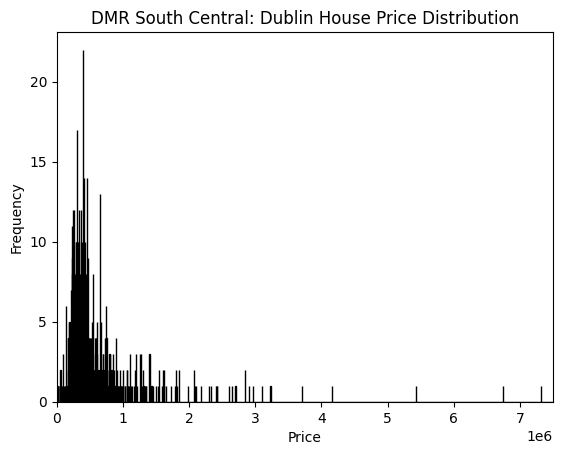

In [27]:
# Create a histogram to visualize the distribution of prices
plt.hist(DMR_south_central['price'], bins=100000, color='skyblue', edgecolor='black')

plt.xlim(right=7500000)
plt.xlim(left=0)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('DMR South Central: Dublin House Price Distribution')

# Show plot
plt.show()

### DMR South Central: The average price of the main distribution

In [28]:
South_central_house_main = DMR_south_central[DMR_south_central['price']<=4000000].copy()
South_central_average_dublin_main = South_central_house_main['price'].mean().round(3)

print('The average house price in DMR South Central between the main price distribution regions is: ', South_central_average_dublin_main)

The average house price in DMR South Central between the main price distribution regions is:  514253.378


### 5. DMR West

In [105]:
num_property_west = len(DMR_west)
print('Number of property recorded in DMR West is: ', num_property_west)

Number of property recorded in DMR West is:  2401


In [30]:
average_west = DMR_west['price'].mean().round(3)
minimum_west = DMR_west['price'].min().round(3)
maximum_west = DMR_west['price'].max().round(3)

print('The average house price in DMR West is: ', average_west)
print('The maximum house price in DMR West is: ', maximum_west)
print('The minimum house price in DMR West is: ', minimum_west)

The average house price in DMR West is:  351764.576
The maximum house price in DMR West is:  34188546.26
The minimum house price in DMR West is:  15000.0


### DMR West: Check the distribution

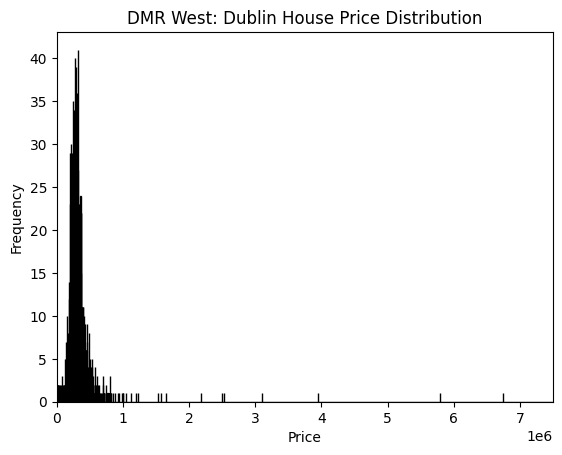

In [31]:
# Create a histogram to visualize the distribution of prices
plt.hist(DMR_west['price'], bins=100000, color='skyblue', edgecolor='black')

plt.xlim(right=7500000)
plt.xlim(left=0)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('DMR West: Dublin House Price Distribution')

# Show plot
plt.show()

### DMR West: The average price of the main distribution

In [32]:
West_house_main = DMR_west[DMR_west['price']<=2000000].copy()
West_average_dublin_main = West_house_main['price'].mean().round(3)

print('The average house price in DMR West between the main price distribution regions is: ', West_average_dublin_main)

The average house price in DMR West between the main price distribution regions is:  309079.816


### 6. DMR East

In [106]:
num_property_east = len(DMR_east)
print('Number of property recorded in DMR East is: ', num_property_east)

Number of property recorded in DMR East is:  1504


In [107]:
average_east = DMR_east['price'].mean().round(3)
minimum_east = DMR_east['price'].min().round(3)
maximum_east = DMR_east['price'].max().round(3)

print('The average house price in DMR East is: ', average_east)
print('The maximum house price in DMR East is: ', maximum_east)
print('The minimum house price in DMR East is: ', minimum_east)

The average house price in DMR East is:  617362.235
The maximum house price in DMR East is:  43589000.0
The minimum house price in DMR East is:  12500.0


### DMR East: Check the distribution

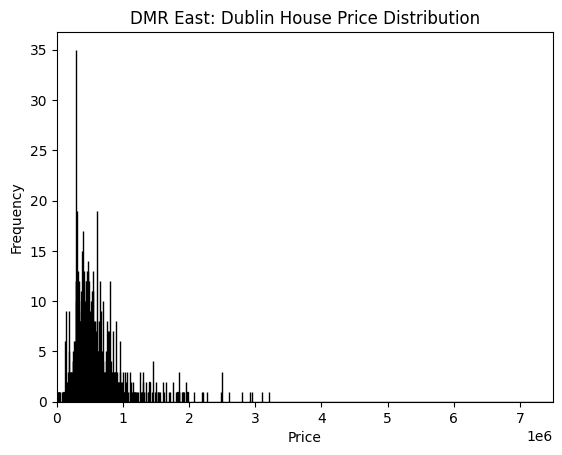

In [109]:
# Create a histogram to visualize the distribution of prices
plt.hist(DMR_east['price'], bins=100000, color='skyblue', edgecolor='black')

plt.xlim(right=7500000)
plt.xlim(left=0)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('DMR East: Dublin House Price Distribution')

# Show plot
plt.show()

### DMR East: The average price of the main distribution

In [108]:
East_house_main = DMR_east[DMR_east['price']<=4000000].copy()
East_average_dublin_main = East_house_main['price'].mean().round(3)

print('The average house price in DMR East between the main price distribution regions is: ', East_average_dublin_main)

The average house price in DMR East between the main price distribution regions is:  564508.195


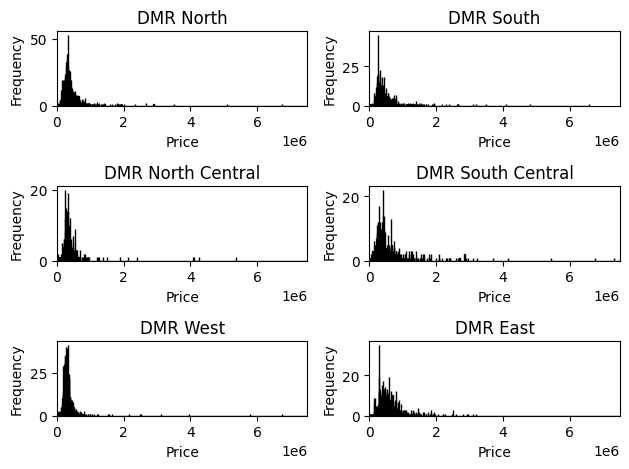

In [111]:
# Create a 3x2 subplots
fig, axs = plt.subplots(3, 2)

# Define the regions
regions = ['DMR North', 'DMR South', 'DMR North Central', 'DMR South Central', 'DMR West', 'DMR East']

# Iterate through each region and create a histogram
for i, region in enumerate(regions):
    # Determine the subplot index
    row = i // 2
    col = i % 2
    
    # Create a histogram for the current region
    axs[row, col].hist(Dublin_houseprice_df[Dublin_houseprice_df['garda division'] == region]['price'], bins=100000, color='skyblue', edgecolor='black')
    
    # Set x-axis limits
    axs[row, col].set_xlim(0, 7500000)
    
    # Add labels and title
    axs[row, col].set_xlabel('Price')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'{region}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Summary Table

| Devisions | Main Average Price (Euros)| Minimum Price (Euros)| Maximum Price (Euros) | #Properties
|---|---|---|---|---|
| Dublin | 408,550.314 | 5900 | 129,500,000 | 9768 |
| DMR West | 309,079.816 | 15,000 | 34,188,546.26 | 2401 |
| DMR North Central | 362,577.376 | 5900 | 22,008,000 | 664 |
| DMR North | 373,828.716 | 7215.86 | 48,324,000 | 2558 |
| DMR South | 419,670.593 | 12,463.22 | 6,584,000 | 1655 |
| DMR South Central |  514,253.378 | 10,000 | 129,500,000 | 986 |
| DMR East | 564,508.195 | 12,500 | 43,589,000| 1504 |

In [274]:
# pip install geopandas

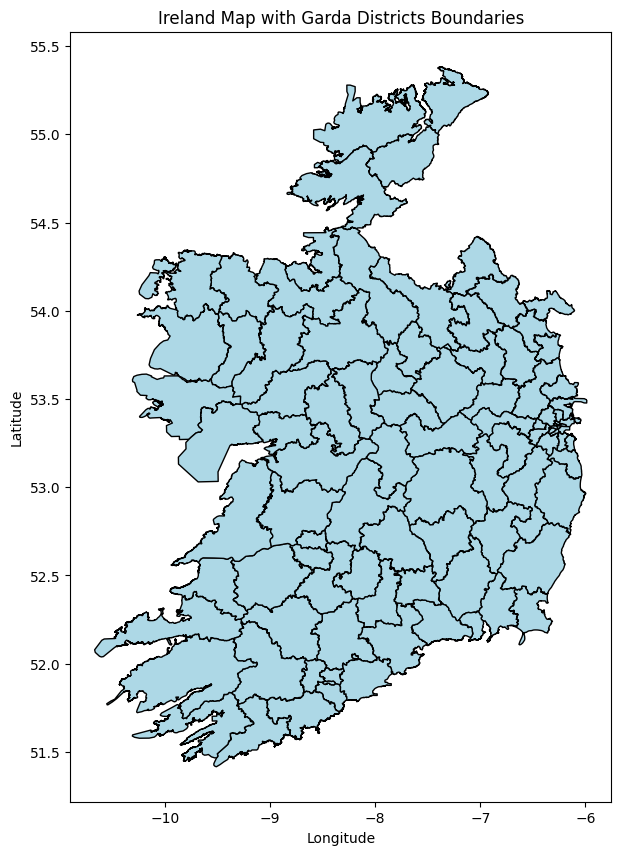

In [78]:
import geopandas as gpd
import matplotlib.pyplot as plt

## Load the GeoJSON file
gdf = gpd.read_file("/Users/yihuizhang/Desktop/docker.yml/Garda_Districts_-_An_Garda_Siochana.geojson")

## Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='lightblue', edgecolor='black')
plt.title("Ireland Map with Garda Districts Boundaries")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



In [39]:
gdf

,FID,District_N,District_C,Division,Area_Sq_km,Area_Sq_Mi,Revised_YN,Revised_Da,Pop_by_Dis,Housholds_,...,LONGITUDE,LATITUDE,FULL_TIME_,AREA_CODE,PHONE_NUMB,STATION_TY,Shape_Leng,Shape__Area,Shape__Length,geometry
0,1,Store Street,1800G,DMR North Central,6.817,2.632,YES,2019-11-28 00:00:00+00:00,22775,7994,...,-6.252246,53.350455,1,01,6668000,Division HQ,14465.294485,6.845086e+06,14465.294485,"POLYGON Z ((-6.26692 53.35421 0.00000, -6.2660..."
1,2,Pearse Street,1000F,DMR South Central,3.178,1.227,YES,2019-11-28 00:00:00+00:00,20034,6089,...,-6.256269,53.345702,1,01,6669000,District HQ,8082.520076,3.191616e+06,8082.520076,"POLYGON Z ((-6.26772 53.34570 0.00000, -6.2677..."
2,3,Bridewell,1870H,DMR North Central,2.998,1.158,YES,2019-11-28 00:00:00+00:00,24012,9919,...,-6.27413,53.34708,0,01,6668200,District HQ,8416.877906,3.038431e+06,8416.877906,"POLYGON Z ((-6.26692 53.35421 0.00000, -6.2669..."
3,4,Granard,2470H,Mayo & Roscommon/Longford,562.905,217.339,YES,2019-11-28 00:00:00+00:00,16246,6042,...,-7.494222,53.778552,1,043,6687660,District HQ,163078.791740,5.651111e+08,163078.791740,"POLYGON Z ((-7.37492 53.75556 0.00000, -7.3765..."
4,5,Longford,2400G,Mayo & Roscommon/Longford,523.854,202.261,YES,2019-11-28 00:00:00+00:00,24609,9080,...,-7.80138,53.73251,1,043,3350570,District HQ,146816.571014,5.258858e+08,146816.571014,"POLYGON Z ((-7.60116 53.59875 0.00000, -7.6034..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Blanchardstown,1700M,DMR West,94.509,36.490,YES,2019-11-28 00:00:00+00:00,174165,58455,...,-6.380975,53.38992,1,01,6667000,Division HQ,53403.983596,9.310769e+07,53403.983596,"POLYGON Z ((-6.29713 53.43292 0.00000, -6.2982..."
92,93,Ballymun,1502H,DMR North,28.288,10.922,YES,2019-11-28 00:00:00+00:00,60837,21459,...,-6.26371,53.394531,1,01,6664400,Division HQ,27961.904258,3.240485e+07,27961.904258,"POLYGON Z ((-6.29713 53.43292 0.00000, -6.2963..."
93,94,Midleton,4200E,Cork North & Cork West,661.812,255.527,YES,2019-11-28 00:00:00+00:00,67533,23787,...,-8.173526,51.916681,1,021,4621550,District HQ,169292.562391,6.641187e+08,169292.562391,"POLYGON Z ((-7.84112 51.94671 0.00000, -7.8428..."
94,95,Letterkenny,206,Donegal/Sligo & Leitrim,982.740,379.438,YES,2019-11-28 00:00:00+00:00,56995,20692,...,-7.736422,54.954697,0,074,9167100,Division HQ,197449.418723,9.868244e+08,197449.418723,"POLYGON Z ((-7.39186 54.94542 0.00000, -7.4003..."


In [40]:
## filter rows where the 'division' column contains the word 'DMR'
dublin_gdf = gdf[gdf['Division'].str.contains('DMR', case=False)]

In [41]:
dublin_gdf

,FID,District_N,District_C,Division,Area_Sq_km,Area_Sq_Mi,Revised_YN,Revised_Da,Pop_by_Dis,Housholds_,...,LONGITUDE,LATITUDE,FULL_TIME_,AREA_CODE,PHONE_NUMB,STATION_TY,Shape_Leng,Shape__Area,Shape__Length,geometry
0,1,Store Street,1800G,DMR North Central,6.817,2.632,YES,2019-11-28 00:00:00+00:00,22775,7994,...,-6.252246,53.350455,1,01,6668000,Division HQ,14465.294485,6.845086e+06,14465.294485,"POLYGON Z ((-6.26692 53.35421 0.00000, -6.2660..."
1,2,Pearse Street,1000F,DMR South Central,3.178,1.227,YES,2019-11-28 00:00:00+00:00,20034,6089,...,-6.256269,53.345702,1,01,6669000,District HQ,8082.520076,3.191616e+06,8082.520076,"POLYGON Z ((-6.26772 53.34570 0.00000, -6.2677..."
2,3,Bridewell,1870H,DMR North Central,2.998,1.158,YES,2019-11-28 00:00:00+00:00,24012,9919,...,-6.27413,53.34708,0,01,6668200,District HQ,8416.877906,3.038431e+06,8416.877906,"POLYGON Z ((-6.26692 53.35421 0.00000, -6.2669..."
12,13,Balbriggan,2200D,DMR North,227.013,87.650,YES,2019-11-28 00:00:00+00:00,61845,23304,...,-6.191172,53.61433,1,01,802 0510,District HQ,97082.664274,2.279639e+08,97082.664274,"POLYGON Z ((-6.06766 53.59235 0.00000, -6.0680..."
17,18,Dun Laoghaire,1900C,DMR East,50.164,19.368,YES,2019-11-28 00:00:00+00:00,96713,34917,...,-6.133347,53.289915,1,01,6665000,Division HQ,46298.476512,5.037267e+07,46298.476512,"POLYGON Z ((-6.09113 53.27100 0.00000, -6.0911..."
18,19,Tallaght,1372B,DMR South,126.374,48.793,YES,2019-11-28 00:00:00+00:00,143263,48548,...,-6.367838,53.286801,1,01,6666000,District HQ,66861.736622,1.268899e+08,66861.736622,"POLYGON Z ((-6.24948 53.25737 0.00000, -6.2509..."
19,20,Crumlin,1300E,DMR South,11.374,4.391,YES,2019-11-28 00:00:00+00:00,51095,20090,...,-6.315017,53.319567,1,01,6666200,Division HQ,15063.095421,1.142032e+07,15063.095421,"POLYGON Z ((-6.27558 53.32967 0.00000, -6.2797..."
20,21,Terenure,1470B,DMR South,11.130,4.297,YES,2019-11-28 00:00:00+00:00,53352,21651,...,-6.288029,53.309815,1,01,6666400,District HQ,18492.513403,1.117542e+07,18492.513403,"POLYGON Z ((-6.25152 53.30802 0.00000, -6.2517..."
21,22,Clondalkin,1721C,DMR West,84.707,32.706,YES,2019-11-28 00:00:00+00:00,76873,26142,...,-6.394958,53.323146,0,01,6667600,District HQ,60803.519768,8.431318e+07,60803.519768,"POLYGON Z ((-6.32732 53.34110 0.00000, -6.3475..."
22,23,Lucan,1710H,DMR West,36.898,14.246,YES,2019-11-28 00:00:00+00:00,70933,21588,...,-6.45068,53.356052,1,01,6667300,District HQ,32118.289902,3.778568e+07,32118.289902,"POLYGON Z ((-6.36736 53.36203 0.00000, -6.3693..."


In [113]:
# Create a dictionary to map each division to a unique color
division_colors = {
    'DMR North': 'moccasin',
    'DMR South': 'lightblue',
    'DMR East': 'lightgreen',
    'DMR West': 'gray',
    'DMR North Central': 'lavender',
    'DMR South Central': 'lightpink'
}

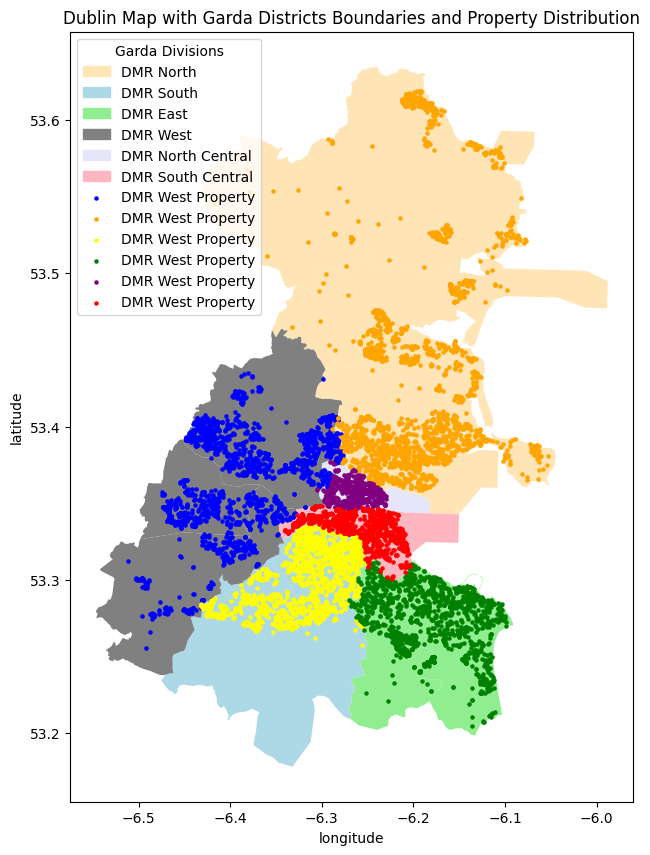

In [114]:
from matplotlib.patches import Patch
fig, ax = plt.subplots(figsize=(10, 10))
for division, color in division_colors.items():
    dublin_gdf[dublin_gdf['Division'] == division].plot(ax=ax, color=color, label=division)

## Add a legend
legend_handles = [Patch(color=color, label=division) for division, color in division_colors.items()]
ax.legend(handles=legend_handles, title='Garda Divisions')

## title
plt.title("Dublin Map with Garda Districts Boundaries and Property Distribution")

DMR_west.plot(kind='scatter', x='longitude', y='latitude', color='blue', ax=ax, label='DMR West Property',s=5)
DMR_north.plot(kind='scatter', x='longitude', y='latitude', color='orange', ax=ax, label='DMR West Property',s=5)
DMR_south.plot(kind='scatter', x='longitude', y='latitude', color='yellow', ax=ax, label='DMR West Property',s=5)
DMR_east.plot(kind='scatter', x='longitude', y='latitude', color='green', ax=ax, label='DMR West Property',s=5)
DMR_north_central.plot(kind='scatter', x='longitude', y='latitude', color='purple', ax=ax, label='DMR West Property',s=5)
DMR_south_central.plot(kind='scatter', x='longitude', y='latitude', color='red', ax=ax, label='DMR West Property',s=5)

## Display the plot
plt.show()

### The houses distribution less than average

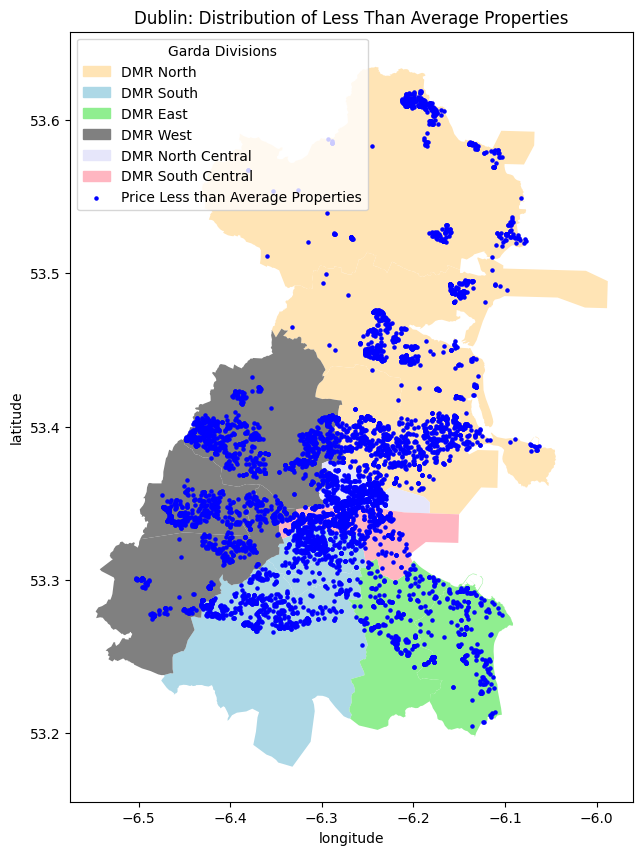

In [115]:
from matplotlib.patches import Patch
fig, ax = plt.subplots(figsize=(10, 10))
for division, color in division_colors.items():
    dublin_gdf[dublin_gdf['Division'] == division].plot(ax=ax, color=color, label=division)

## Add a legend
legend_handles = [Patch(color=color, label=division) for division, color in division_colors.items()]
ax.legend(handles=legend_handles, title='Garda Divisions')

## title
plt.title("Dublin: Distribution of Less Than Average Properties")

dublin_property_less_average.plot(kind='scatter', x='longitude', y='latitude', color='blue', ax=ax, label='Price Less than Average Properties',s=5)

## Display the plot
plt.show()

In [116]:
less_average_property_count_per_region = dublin_property_less_average.groupby('garda division').size().reset_index(name='property_count')

In [117]:
less_average_property_count_per_region

,garda division,property_count
0,DMR East,517
1,DMR North,1837
2,DMR North Central,491
3,DMR South,1065
4,DMR South Central,539
5,DMR West,2081


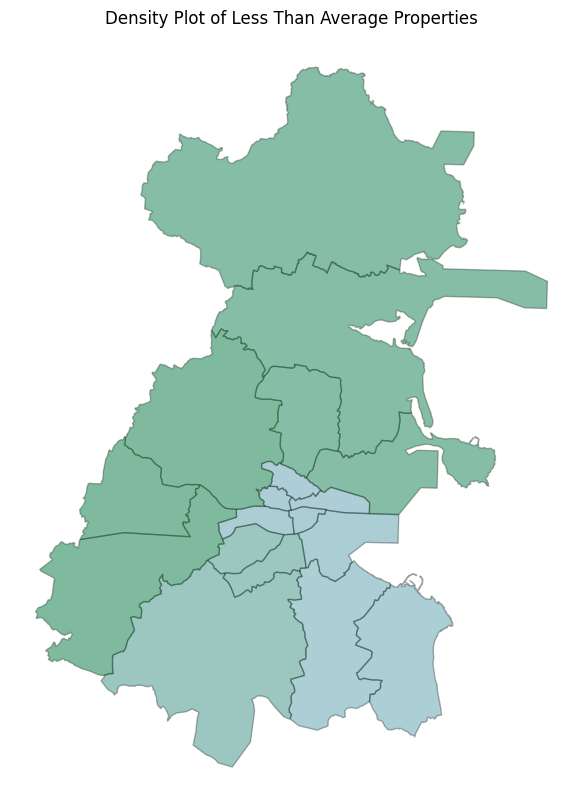

In [118]:
## plot map
fig, ax = plt.subplots(figsize=(10, 10))
dublin_gdf.plot(ax=ax, edgecolor='black', alpha=0.3)

total_count = less_average_property_count_per_region['property_count'].sum()
for index, row in less_average_property_count_per_region.iterrows():
    division = row['garda division']
    count = row['property_count']
    
    # Find the division in the GeoDataFrame and plot it with a color intensity based on the count
    dublin_gdf[dublin_gdf['Division'] == division].plot(ax=ax, color='green', alpha=count/total_count)

# Add a title
ax.set_title('Density Plot of Less Than Average Properties')

# Remove the axis
ax.set_axis_off()

# Show the plot
plt.show()

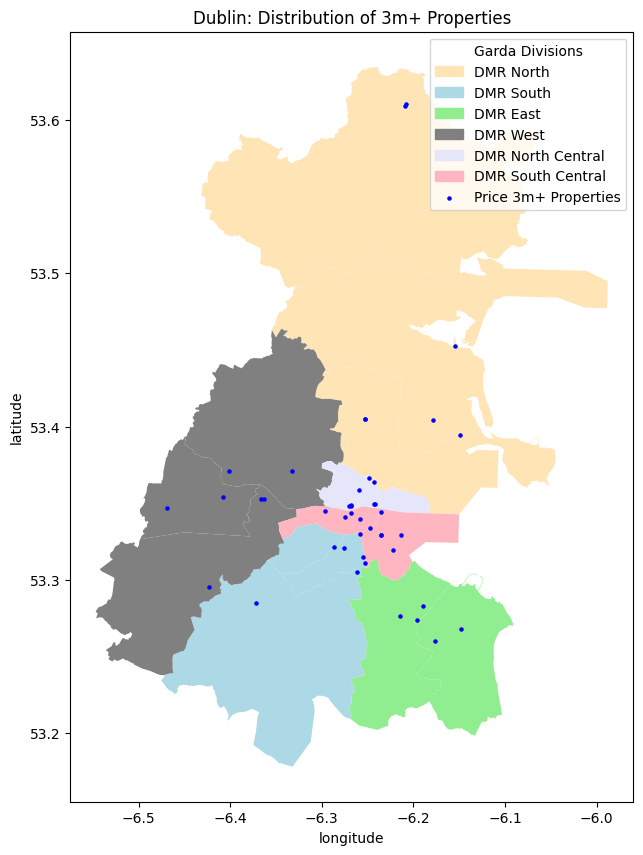

In [119]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(10, 10))
for division, color in division_colors.items():
    dublin_gdf[dublin_gdf['Division'] == division].plot(ax=ax, color=color, label=division)

## Add a legend
legend_handles = [Patch(color=color, label=division) for division, color in division_colors.items()]
ax.legend(handles=legend_handles, title='Garda Divisions')

## title
plt.title("Dublin: Distribution of 3m+ Properties")

dublin_property_larger_than_3m.plot(kind='scatter', x='longitude', y='latitude', color='blue', ax=ax, label='Price 3m+ Properties',s=5)

## Display the plot
plt.show()

In [120]:
greater_3m_property_count_per_region = dublin_property_larger_than_3m.groupby('garda division').size().reset_index(name='property_count')
greater_3m_property_count_per_region

,garda division,property_count
0,DMR East,5
1,DMR North,9
2,DMR North Central,6
3,DMR South,6
4,DMR South Central,11
5,DMR West,7


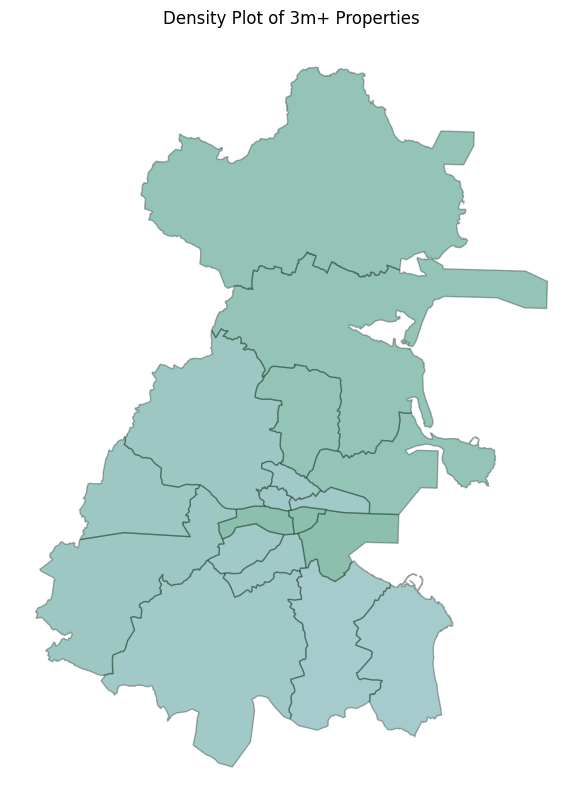

In [121]:
## plot map
fig, ax = plt.subplots(figsize=(10, 10))
dublin_gdf.plot(ax=ax, edgecolor='black', alpha=0.3)

total_count = greater_3m_property_count_per_region['property_count'].sum()
for index, row in greater_3m_property_count_per_region.iterrows():
    division = row['garda division']
    count = row['property_count']
    
    # Find the division in the GeoDataFrame and plot it with a color intensity based on the count
    dublin_gdf[dublin_gdf['Division'] == division].plot(ax=ax, color='green', alpha=count/total_count)

# Add a title
ax.set_title('Density Plot of 3m+ Properties')

# Remove the axis
ax.set_axis_off()

# Show the plot
plt.show()

### Dublin new build distributions

In [ ]:
dublin_new_build

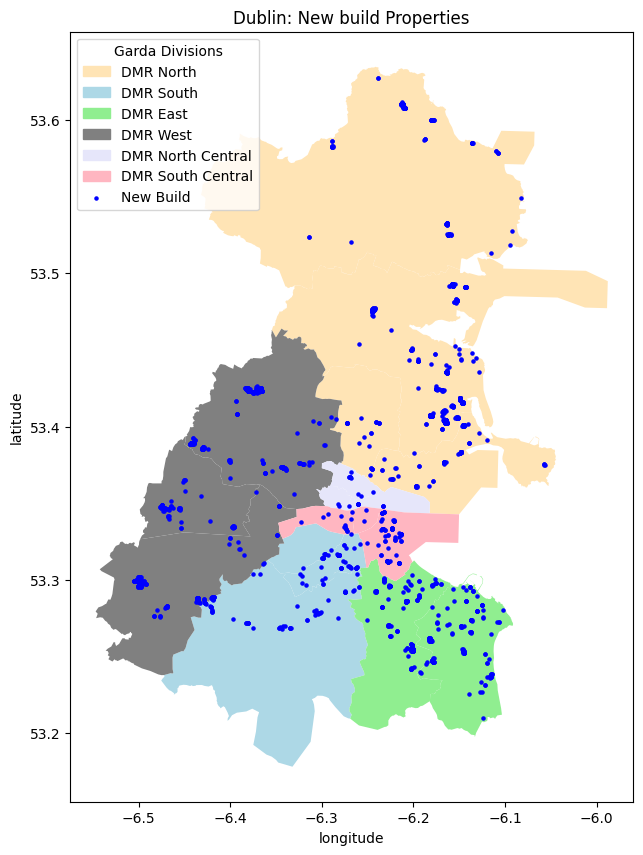

In [292]:
fig, ax = plt.subplots(figsize=(10, 10))
for division, color in division_colors.items():
    dublin_gdf[dublin_gdf['Division'] == division].plot(ax=ax, color=color, label=division)

## Add a legend
legend_handles = [Patch(color=color, label=division) for division, color in division_colors.items()]
ax.legend(handles=legend_handles, title='Garda Divisions')

## title
plt.title("Dublin: New build Properties")

dublin_new_build.plot(kind='scatter', x='longitude', y='latitude', color='blue', ax=ax, label='New Build',s=5)

## Display the plot
plt.show()

In [293]:
new_build_count = dublin_new_build.groupby('garda division').size().reset_index(name='property_count')
new_build_count

,garda division,property_count
0,DMR East,415
1,DMR North,816
2,DMR North Central,23
3,DMR South,143
4,DMR South Central,131
5,DMR West,779


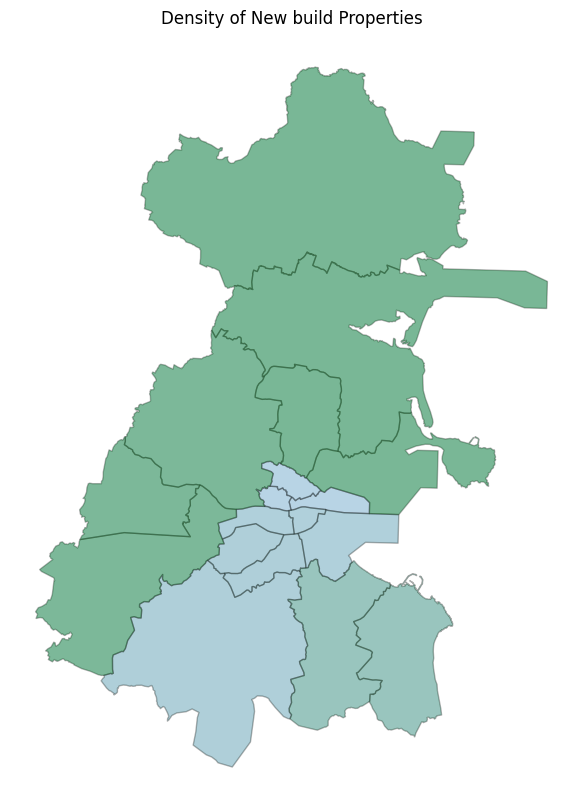

In [294]:
## plot map
fig, ax = plt.subplots(figsize=(10, 10))
dublin_gdf.plot(ax=ax, edgecolor='black', alpha=0.3)

total_count = new_build_count['property_count'].sum()
for index, row in new_build_count.iterrows():
    division = row['garda division']
    count = row['property_count']
    
    # Find the division in the GeoDataFrame and plot it with a color intensity based on the count
    dublin_gdf[dublin_gdf['Division'] == division].plot(ax=ax, color='green', alpha=count/total_count)

# Add a title
ax.set_title('Density of New build Properties')

# Remove the axis
ax.set_axis_off()

# Show the plot
plt.show()